# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,5

---
# 2. import dataset

In [3]:
df = pd.read_csv('lung.csv')
df['status'] = df['status'] - 1
df.shape

(228, 10)

---
# 3. model

In [4]:
model = KaplanMeierFitter()
model.fit(durations = df['time'], event_observed = df['status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

---
# 4. survival plot

Text(0, 0.5, 'Survival')

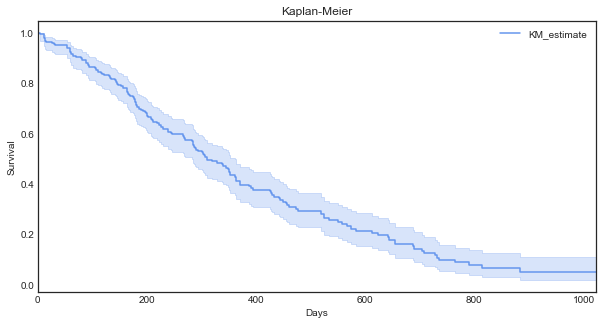

In [5]:
model.plot(color="cornflowerblue")
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

In [6]:
er = model.event_table.reset_index()
er['survival'] = np.round(er['at_risk'] / er['at_risk'].max(),2)
print('100 percentile :',np.round(er[er['survival']==er['survival'].max()]['event_at'][0],2))
print('75 percentile :',np.round(er[er['survival']==np.round(er['survival'].quantile(0.75),2)]['event_at'][45],2))
print('50 percentile :',np.round(er[er['survival']==er['survival'].median()]['event_at'][92],2))
print('25 percentile :',np.round(er[er['survival']==er['survival'].quantile(0.25)]['event_at'][139],2))
print('0 percentile :',np.round(er[er['survival']==er['survival'].min()]['event_at'].item(),2))

100 percentile : 0.0
75 percentile : 176.0
50 percentile : 270.0
25 percentile : 442.0
0 percentile : 1022.0


---
# 5. log rank

In [7]:
male = df[df['sex'] == 1]
model_males = KaplanMeierFitter()
model_males.fit(durations = male['time'], event_observed = male['status'])

female = df[df['sex'] == 2]
model_females = KaplanMeierFitter()
model_females.fit(durations = female['time'], event_observed = female['status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

Text(0, 0.5, 'Survival')

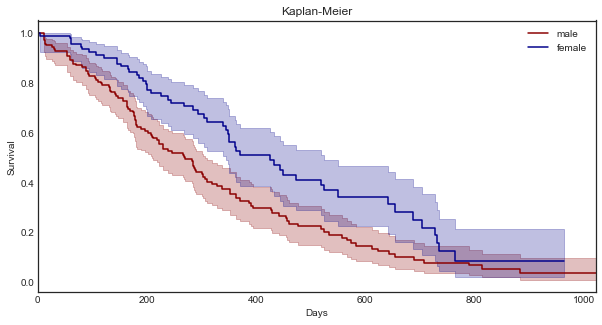

In [8]:
model_males.plot(color='darkred', label = "male")
model_females.plot( color='darkblue', label = "female")
plt.title("Kaplan-Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

In [9]:
logrank_test(durations_A = male['time'], durations_B = female['time'],
             event_observed_A = male['status'], event_observed_B = female['status'])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57